## Analysis of TED Talk Popularity
Started in 1984 as a technology and design conference, TED (Technology, Entertainment, Design) has erupted in popularity within the last decade due to the proliferation of TED Talks. Nowadays, these presentations cover a variety of topics beyond tech and design, ranging from physics to sociology to politics. TED launched TED.com, a website that now hosts thousands of TED talks available for free viewing. In fact, by 2012, TED reached its billionth video view, a number that has no doubt continued to grow.

However, not all TED Talks are equally popular. Previous data analyses suggest that "those given by academics tend to be watched more online while art and design videos tend to be watched less than average" (Wikipedia). The purpose of this analysis is to investigate which TED Talks receive the most attention, both in the form of views and comments. To this end, I'll be analyzing a dataset containing information about all audio-video recordings of TED Talks uploaded to the official TED website through September 21, 2017. 

I plan to investigate the following:
* Which are the most viewed TED Talks of all time?
* Which talks generate the most discussion in terms of the number of comments made? Is there a potential correlation between how many views a TED Talk receives and the number of comments are contributed?

#### Importing the Data

In [1]:
# Import and investigate the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
ted_talks = pd.read_csv('ted_main.csv')

#### Cleaning the Data

Before performing any analyses, we need to ensure that our data doesn't contain any null values that can cause errors. Since we only plan on analyzing data from the 'Views' and 'Comments' columns, we need only check the data there for missing information. 

In [50]:
# Finding missing values in the 'views' column.
views_null = pd.isnull(ted_talks['views'])
print(len(ted_talks['views'][views_null]))

# Find missing values in the 'comments' column.
comments_null = pd.isnull(ted_talks['comments'])
print(len(ted_talks['comments'][comments_null]))

0
0


Looks like both columns are 'null value free,' which means we won't have to do any further cleaning. Let's go ahead and perform some general statiscal analyses on the dataset to see if we can glean any basic insights.

In [2]:
print(ted_talks.columns)
print(ted_talks.shape)
print(ted_talks.describe())

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')
(2550, 17)
          comments     duration     film_date    languages  num_speaker  \
count  2550.000000  2550.000000  2.550000e+03  2550.000000  2550.000000   
mean    191.562353   826.510196  1.321928e+09    27.326275     1.028235   
std     282.315223   374.009138  1.197391e+08     9.563452     0.207705   
min       2.000000   135.000000  7.464960e+07     0.000000     1.000000   
25%      63.000000   577.000000  1.257466e+09    23.000000     1.000000   
50%     118.000000   848.000000  1.333238e+09    28.000000     1.000000   
75%     221.750000  1046.750000  1.412964e+09    33.000000     1.000000   
max    6404.000000  5256.000000  1.503792e+09    72.000000     5.000000   

       published_date         views  
count    2

It appears that the average TED Talk receives an average of 1.69 million views. Additionally, the 75th percentile lies at 1.7 million views, while the most popular TED Talk has 47.2 million views. The noticeable disparity between the 75th percentile and the maximum suggests the presence of outliers. This can be confirmed via a histogram and boxplot.

We see a similar trend with the number of comments a TED Talk receives. The average TED Talk has about 192 published comments, and there is a noticeable disparity between the 75th percentile (222 comments) and the maximum (6404 comments). Again, this suggests the presence of outliers.

#### Question #1: Which are the most viewed TED Talks of all time?

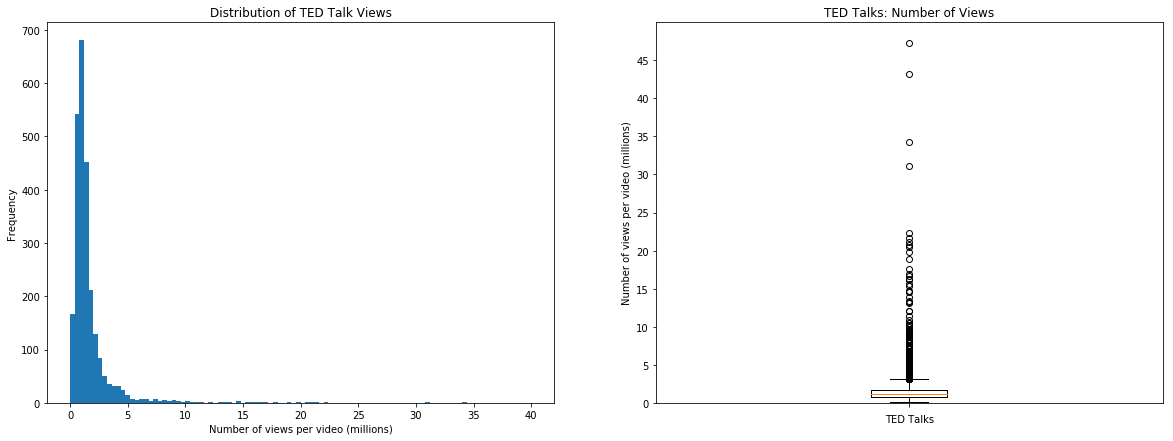

1698297.4815686275
1124523.5


In [62]:
# Create a histogram and box-and-whisker plot to visualize the distribution of TED Talk views.
ted_talks['views_adj'] = views_adj = ted_talks['views']/1000000
fig = plt.figure(figsize=(20,7))

ax1 = fig.add_subplot(1,2,1)
ax1.hist(ted_talks['views_adj'],bins=100,range=(0,40))
ax1.set_title('Distribution of TED Talk Views')
ax1.set_xlabel('Number of views per video (millions)')
ax1.set_ylabel('Frequency')

ax2 = fig.add_subplot(1,2,2)
ax2.boxplot(ted_talks['views_adj'])
ax2.set_title('TED Talks: Number of Views')
ax2.set_xlabel('TED Talks')
ax2.set_ylabel('Number of views per video (millions)')
ax2.set_xticklabels('')
ax2.set_ylim(0,50)
y_tick_positions = np.arange(0,50,5)
ax2.set_yticks(y_tick_positions)

plt.show()

print(np.mean(ted_talks['views']))
print(np.median(ted_talks['views']))

Our histogram and boxplot confirm that the the distribution of views per TED Talk is skewed right; there are several outliers that deviate from the mean. Because the mean is sensitive to outliers, the median (1.12 million views per video) is a more appropriate representation of the distribution than the mean (1.70 million views per video). This will be helpful to keep in mind as we continue analysis of the dataset. Now, let's address the question directly.

In [119]:
# Re-sort the dataset based on number of views.
popular_talks = ted_talks.sort_values(by='views', ascending=False)[['main_speaker','name','tags','comments','views']]
popular_talks.reset_index(drop=True)

# We can also create a function to test whether each of these talks are considered outliers and by how much (using the
# standard IQR outlier test).

def outliertest(value, col_name):
    from decimal import Decimal
    
    upper_q = np.percentile(ted_talks[col_name],75)
    IQR = upper_q - np.percentile(ted_talks[col_name],25)

    if value > (upper_q + (1.5*IQR)):
        excess = value-(upper_q + (1.5*IQR))
        excess_sn = '%.1E' % Decimal(excess)
        return 'Yes, by ' + str(excess_sn)
    else:
        return 'No'
    
popular_talks['Outlier?'] = popular_talks['views'].apply(outliertest,col_name='views')
popular_talks.head(5)

,main_speaker,name,tags,comments,views,Outlier?
0,Ken Robinson,Ken Robinson: Do schools kill creativity?,"['children', 'creativity', 'culture', 'dance',...",4553,47227110,"Yes, by 4.4E+07"
1346,Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,"['body language', 'brain', 'business', 'psycho...",2290,43155405,"Yes, by 4.0E+07"
677,Simon Sinek,Simon Sinek: How great leaders inspire action,"['TEDx', 'business', 'entrepreneur', 'leadersh...",1930,34309432,"Yes, by 3.1E+07"
837,Brené Brown,Brené Brown: The power of vulnerability,"['TEDx', 'communication', 'culture', 'depressi...",1927,31168150,"Yes, by 2.8E+07"
452,Mary Roach,Mary Roach: 10 things you didn't know about or...,"['books', 'culture', 'history', 'humor', 'scie...",354,22270883,"Yes, by 1.9E+07"


After re-sorting our dataset by 'views' and filtering it down to the talk name, main speaker, and tags, we now have the top 5 most viewed TED Talks of all time:
    
    * "Do schools kill creativity? by Ken Robinson
    * "Your body language may shape who you are" by Amy Cuddy
    * "How great leaders inspire action" by Simon Sinek
    * "The power of vulnerability" by Brené Brown
    * "10 things you didn't know about orgasm" by Mary Roach

Futhermore, it appears as though the most popular talks receive significantly more views than other TED Talks; even among outliers, their view counts are noticeably high. This implies that these talks are drastically more popular than the average TED Talk. Interestingly, the most viewed TED Talks appear to cover topics involving sociology, psychology, anthropology, more often than technology and business. However, further analysis is necessary to confirm this insight.

#### Question #2: Which 'tags' receive the most views? Is there a correlation between subject matter and the number of views a video receives?

191.56235294117647
118.0


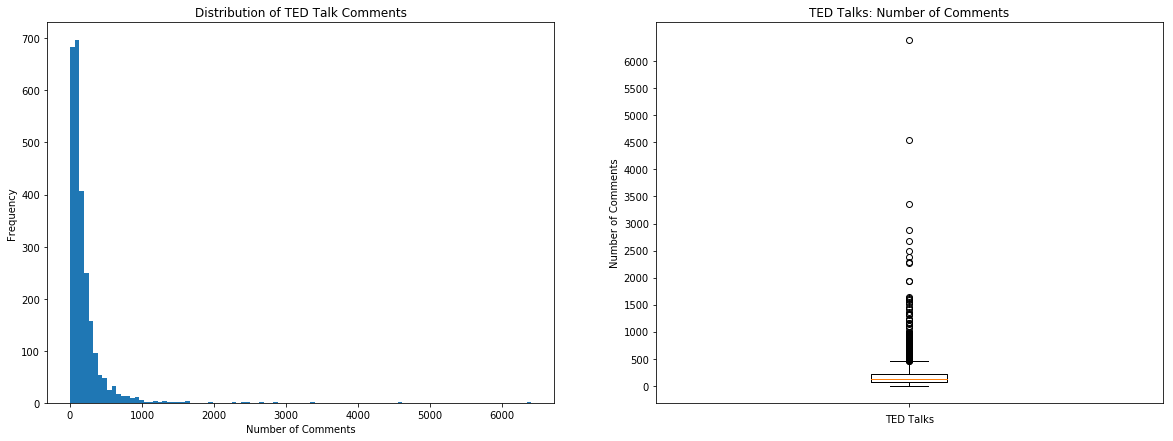

In [63]:
# Create a histogram and box-and-whisker plot to visualize the distribution of TED Talk comments.
fig = plt.figure(figsize=(20,7))

ax1 = fig.add_subplot(1,2,1)
ax1.hist(ted_talks['comments'],bins=100)
ax1.set_xlabel('Number of Comments')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of TED Talk Comments')

ax2 = fig.add_subplot(1,2,2)
ax2.boxplot(ted_talks['comments'])
ax2.set_yticks(np.arange(0,6500,500))
ax2.set_xticklabels('')
ax2.set_xlabel('TED Talks')
ax2.set_ylabel('Number of Comments')
ax2.set_title('TED Talks: Number of Comments')

plt.show

print(np.mean(ted_talks['comments']))
print(np.median(ted_talks['comments']))

As with the distribution of views, the distribution of comments per video seems to somewhat skewed right, and several outliers are presence in our box-and-whisker plot. This suggests that the median (118 comments per video) is a more accurate representation of the distribution than the mean (120 comments per video).

Let's see which TED Talks have received the most comments.

In [122]:
# Re-sort the dataset based on number of comments.
commented_talks = ted_talks.sort_values(by='comments',ascending=False)[['main_speaker','name','tags','views','comments']]
commented_talks.reset_index(drop=True)

# We can use the function we created earlier to determine which values within the 'comments' column are considered outliers.

def outliertest(value, col_name):
    from decimal import Decimal
    
    upper_q = np.percentile(ted_talks[col_name],75)
    IQR = upper_q - np.percentile(ted_talks[col_name],25)

    if value > (upper_q + (1.5*IQR)):
        excess = value-(upper_q + (1.5*IQR))
        excess_sn = '%.1E' % Decimal(excess)
        return 'Yes, by ' + str(excess_sn)
    else:
        return 'No'

commented_talks['Outlier?'] = commented_talks['comments'].apply(outliertest, col_name='comments')
commented_talks.head(5)

,main_speaker,name,tags,views,comments,Outlier?
96,Richard Dawkins,Richard Dawkins: Militant atheism,"['God', 'atheism', 'culture', 'religion', 'sci...",4374792,6404,"Yes, by 5.9E+03"
0,Ken Robinson,Ken Robinson: Do schools kill creativity?,"['children', 'creativity', 'culture', 'dance',...",47227110,4553,"Yes, by 4.1E+03"
644,Sam Harris,Sam Harris: Science can answer moral questions,"['culture', 'evolutionary psychology', 'global...",3433437,3356,"Yes, by 2.9E+03"
201,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,"['biology', 'brain', 'consciousness', 'global ...",21190883,2877,"Yes, by 2.4E+03"
1787,David Chalmers,David Chalmers: How do you explain consciousness?,"['brain', 'consciousness', 'neuroscience', 'ph...",2162764,2673,"Yes, by 2.2E+03"


After re-sorting our dataset by 'comments' and filtering it down to the talk name, main speaker, tags, and comments, we now have the top 5 most most commented-on TED Talks of all time:

    * "Militant atheism" by Richard Dawkins
    * "Do schools kill creativity?" by Ken Robinson
    * "Science can answer moral questions" by Sam Harris
    * "My stroke of insight" by Jill Bolte Taylor
    * "How do you explain consciousness?" by David Chalmers
    
Note that only one top 5 most viewed talks, "Do schools kill creativity?" by Ken Robinson, is also among the most commented-on talks. Additionally, the 'tags' from this top 5 are notably different than those from the most popular top 5. Whereas the most viewed videos' tags were associated with behavioral psychology and sociology, the most commented-on talks tags' largely have to do with existential psychology and philosophy. Given that discussions regarding existential belief and human consciousness are prone to debate, it makes sense that these videos would receive the most comments.

Now that we know the most viewed and commented-on videos, let's briefly examine the correlation between 'views' and 'comments.' We can do this by using both a scatterplot of the two variables, as well as by calculating the Pearson correlation coefficient.

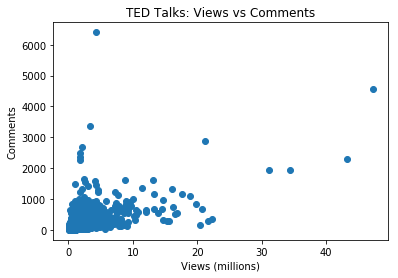

,comments,duration,film_date,languages,num_speaker,published_date,views,views_adj
comments,1.000000,0.140694,-0.133303,0.318284,-0.035489,-0.185936,0.530939,0.530939
duration,0.140694,1.000000,-0.242941,-0.295681,0.022257,-0.166324,0.048740,0.048740
film_date,-0.133303,-0.242941,1.000000,-0.061957,0.040227,0.902565,0.006447,0.006447
languages,0.318284,-0.295681,-0.061957,1.000000,-0.063100,-0.171836,0.377623,0.377623
num_speaker,-0.035489,0.022257,0.040227,-0.063100,1.000000,0.049240,-0.026389,-0.026389
published_date,-0.185936,-0.166324,0.902565,-0.171836,0.049240,1.000000,-0.017920,-0.017920
views,0.530939,0.048740,0.006447,0.377623,-0.026389,-0.017920,1.000000,1.000000
views_adj,0.530939,0.048740,0.006447,0.377623,-0.026389,-0.017920,1.000000,1.000000


In [134]:
# Plot a scatterplot of 'views' versus 'comments.'

plt.figure()
plt.scatter(ted_talks['views_adj'],ted_talks['comments'])
plt.title('TED Talks: Views vs Comments')
plt.xlabel('Views (millions)')
plt.ylabel('Comments')
plt.show()

# Calculate the Pearson correlation coefficient.
ted_talks.corr()

The cluster of data points in our scatterplot suggests the magnitude of the relationship between 'views' and 'comments' to be moderate to high, but the nature and direction of the relationship remain hazy. A Pearson correlation coefficient of 0.53 confirms that the magnitude of the relationship is moderate, and that the the two variables are positively correlated (although the relationship does not appear to be linear in nature).

The moderate, positive relationship between number of views and number of comments suggests that the more views a video receives, the more comments it is likely to get. However, as our outliers demonstrate, this is not always the case; there are several videos that receive several thousand more views than average while generating few comments, and vice-versa. Given the variety of tags the top most viewed and most commented-on videos carry, it appears that the subject matter of a video is a stronger predictor of view and comment counts. I plan on testing this hypothesis in the future.